In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
style.use('fivethirtyeight')
parks = pd.read_csv('./data/CPD_Parks.csv')

# Question

* Which wards have the most park area?
* Are there any factors of the wards that are correlated with park area?

Let's begin by taking a look at the dataset to see what we have available

In [3]:
parks.head()    

,the_geom,PARK_NO,OBJECTID_1,PARK,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,LABEL,...,CROQUET,HANDBALL_I,HARBOR,MODELTRAIN,MODELYACHT,NATURE_BIR,MINIGOLF,PERIMETER,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-87.64817638700737 41.83972833...,2,1,MCGUANE (JOHN),2901 S POPLAR AVE,60608.0,10.30,11,COMMUNITY PARK,McGuane,...,0,0,0,0,0,0,0,2672.326627,2672.326627,430341.671424
1,MULTIPOLYGON (((-87.632863551078 41.8344952755...,3,2,ARMOUR (PHILIP) SQUARE,3309 S SHIELDS AVE,60616.0,9.05,11,COMMUNITY PARK,Armour Sq,...,0,0,0,0,0,0,0,2484.283006,2484.283006,391095.834054
2,MULTIPOLYGON (((-87.63554759376666 41.81257646...,4,3,FULLER (MELVILLE),331 W 45TH ST,60609.0,11.31,3,COMMUNITY PARK,Fuller,...,0,0,0,0,0,0,0,2878.428150,2878.428150,497076.662367
3,MULTIPOLYGON (((-87.66976347485802 41.80300994...,5,4,CORNELL (PAUL) SQUARE,1809 W 50TH ST,60609.0,8.80,20,COMMUNITY PARK,Cornell Sq,...,0,0,0,0,0,0,0,2462.607598,2462.607598,385672.402254
4,MULTIPOLYGON (((-87.54799250054684 41.74462388...,6,5,RUSSELL (MARTIN) SQUARE,3045 E 83RD ST,60617.0,10.05,10,COMMUNITY PARK,Russell Sq,...,0,0,0,0,0,0,0,2777.375936,2777.375936,435169.113288


In [4]:
# Cleaning up the column names
parks.columns = [column.lower() for column in parks.columns]

I'm curious if the acreage calculation is correct - it looks like we have the number for shape area as well as an acre number. Let's check this out. For reference:

1 Acre = 43560$ft^2$

I'm assuming that `shape_area` is measured in sq. ft because that gets me closest to the acre number, but there is no documentation on this.

In [5]:
# Divide area by 43560 to get the calculated acres
parks['acre_calc'] = parks['shape_area'] / 43560

Now I'll find the error between the posted acreage vs. calculated acreage

In [6]:
# Listed acres minus calculated acres
parks['acre_error'] = parks['acres'] - parks['acre_calc']

In [7]:
# Absolute value to be used in total error calculations
parks['abs_acre_error'] = abs(parks['acre_error'])

In [8]:
# Pct error to be used for identifying most drastic errors
parks['pct_acre_error'] = parks['acre_error'] / parks['acre_calc']

In [9]:
Why is there such a large error in the acreage calculation? This isn't a huge deal if it's just a number for record-keeping, but that land is being paid for somewhere.

Things to consider:
* Surveying technology has improved drastically over time, the original acreage may have been calculated decades or centuries ago.
* Assessors may or may not consider streets/sidewalks/pathways/physical structures as usable land in the acre calculations, but this would only account for negative errors

*From [Jonathan Goode at Landthink.com](https://www.landthink.com/discussing-discrepancies-in-acreage/)*

,ward,shape_area,acres,acre_calc,acre_error,pct_acre_error
0,11,430341.671424,10.30,9.879285,0.420715,0.042586
1,11,391095.834054,9.05,8.978325,0.071675,0.007983
2,3,497076.662367,11.31,11.411310,-0.101310,-0.008878
3,20,385672.402254,8.80,8.853820,-0.053820,-0.006079
4,10,435169.113288,10.05,9.990108,0.059892,0.005995
...,...,...,...,...,...,...
609,39,12124.046199,0.28,0.278330,0.001670,0.006001
610,4,12011.597200,0.28,0.275748,0.004252,0.015419
611,14,771014.721990,17.60,17.700062,-0.100062,-0.005653
612,10,537682.135164,12.00,12.343483,-0.343483,-0.027827


parks[['ward', 'shape_area', 'acres', 'acre_calc', 'acre_error', 'pct_acre_error']]

In [10]:
parks.sort_values(by='pct_acre_error', ascending=False)[['ward', 'acres', 'acre_calc', 'acre_error', 'shape_area', 'pct_acre_error']]

,ward,acres,acre_calc,acre_error,shape_area,pct_acre_error
303,3,0.01,0.001240,0.008760,54.019238,7.063794
554,8,0.57,0.319706,0.250294,13926.380758,0.782890
286,20,0.75,0.497034,0.252966,21650.800603,0.508951
221,11,0.71,0.500883,0.209117,21818.476676,0.417496
262,37,6.96,5.125157,1.834843,223251.855959,0.358007
...,...,...,...,...,...,...
484,24,0.16,0.245206,-0.085206,10681.155754,-0.347486
506,24,0.18,0.285923,-0.105923,12454.821888,-0.370461
563,49,0.61,0.970685,-0.360685,42283.028797,-0.371578
424,25,3.76,6.050288,-2.290288,263550.550938,-0.378542


In [11]:
abs(parks['acre_error']).mean()

0.35137733655052683

In [12]:
error_df = pd.DataFrame(columns=['num_parks'])

In [13]:
error_df['avg_acre_error'] = parks.groupby('ward').mean()['acre_error']

In [14]:
error_df['abs_avg_acre_error'] = parks.groupby('ward').mean()['acre_error']

In [15]:
error_df['abs_avg_acre_error'] = abs(error_df['abs_avg_acre_error'])

In [16]:
error_df['num_parks'] = parks.groupby('ward').count()['acre_error']

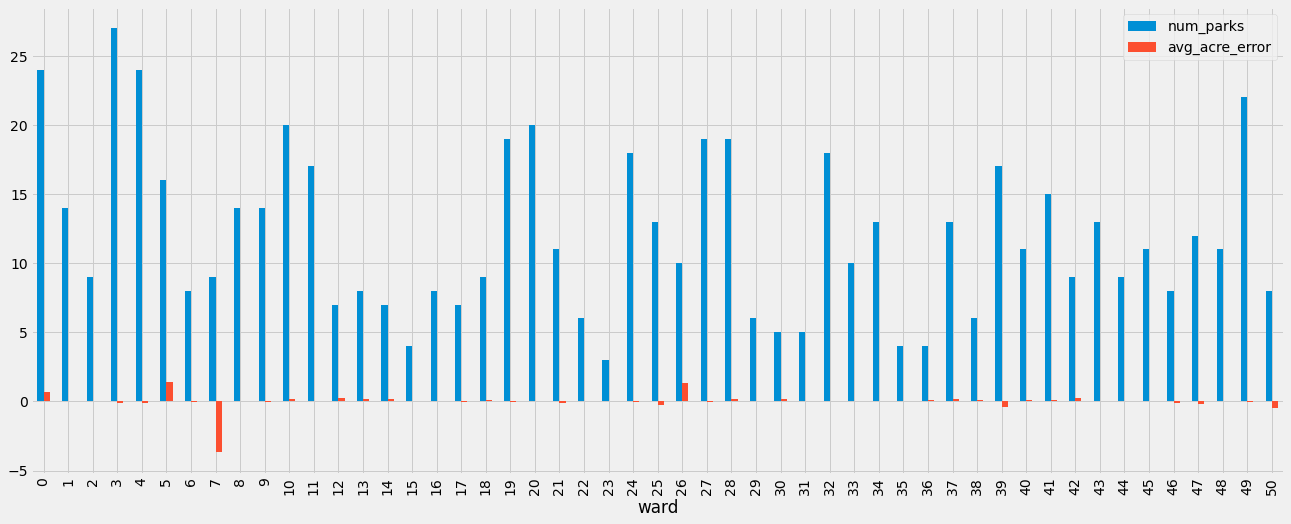

In [17]:
error_df[['num_parks', 'avg_acre_error']].plot(kind='bar', figsize=(20, 8));

Let's look at the top 5 wards ranked by the acre's mean absolute error when comparing actual acreage vs. calculated acreage

In [18]:
error_df.sort_values(by='abs_avg_acre_error', ascending=False).head(5)

,num_parks,avg_acre_error,abs_avg_acre_error
ward,,,
7,9,-3.682938,3.682938
5,16,1.424635,1.424635
26,10,1.357665,1.357665
0,24,0.717121,0.717121
50,8,-0.477914,0.477914


In [32]:
parks['over_actual_acres'] = np.where(parks['acre_error'] > 0, 1, 0)

In [42]:
parks['over_actual_acres'].value_counts(normalize=True)

1    0.586319
0    0.413681
Name: over_actual_acres, dtype: float64

In [41]:
parks.groupby('over_actual_acres').describe()['acre_error']

,count,mean,std,min,25%,50%,75%,max
over_actual_acres,,,,,,,,
0,254.0,-0.392258,2.398623,-33.079655,-0.128173,-0.013264,-0.002952,-0.000015
1,360.0,0.322534,1.752596,0.000001,0.004543,0.018818,0.086881,20.980553


In [40]:
parks.groupby('over_actual_acres').describe()['pct_acre_error']

,count,mean,std,min,25%,50%,75%,max
over_actual_acres,,,,,,,,
0,254.0,-0.046132,0.090568,-0.893297,-0.046575,-0.012688,-0.002401,-0.000015
1,360.0,0.049541,0.376632,0.000004,0.004729,0.011872,0.029980,7.063794


In [61]:
def num_parks_above_thresh(data, column, threshold):
    return f'{data[abs(data[column]) > threshold].shape[0]} parks are above {threshold * 100}% error'

In [62]:
# Getting the number of parks outside a 2% error threshold
num_parks_above_thresh(parks, 'pct_acre_error', 0.02)

'231 parks are above 2.0% error'

In [63]:
# Number of parks outside of a 5% error threshold
num_parks_above_thresh(parks, 'pct_acre_error', 0.05)

'116 parks are above 5.0% error'

In [64]:
# Number of parks outside of a 10% error threshold
num_parks_above_thresh(parks, 'pct_acre_error', 0.10)

'55 parks are above 10.0% error'

In [65]:
# Number of parks outside of a 20% error threshold
num_parks_above_thresh(parks, 'pct_acre_error', 0.20)

'22 parks are above 20.0% error'

In [66]:
# Number of parks outside of a 40% error threshold
num_parks_above_thresh(parks, 'pct_acre_error', 0.40)

'5 parks are above 40.0% error'

## Insights
* 360 (58.6% of total) parks have acres that are higher than the calculated acres
* Of those 360 parks, at least 50% of those parks have a pct_acre_error less than ~1.2%
* 55 parks have a pct_acre_error above 10%

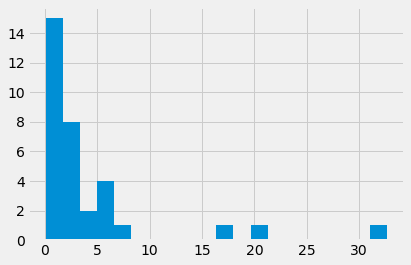

In [87]:
parks[abs(parks['pct_acre_error']).between(.10, .20)]['acres'].hist(bins=20);

In [84]:
parks[abs(parks['pct_acre_error']).between(.10, .20)]['acres'].describe()

count    33.000000
mean      4.167788
std       6.741120
min       0.070000
25%       0.610000
50%       2.090000
75%       4.650000
max      32.670000
Name: acres, dtype: float64

In [86]:
abs(parks[abs(parks['pct_acre_error']).between(.10, .20)]['acre_error']).sum()

17.715249095422404

**50% of parks** with a `pct_acre_error` between 10%-20% are **under 2.09 acres**, but the total error adds up to **17.72 acres**.